# US Census Demographic Data

# This dataset expands on my earlier New York City Census Data dataset. It includes data from the entire country instead of just New York City.

# Loading Data


In [49]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data  = pd.read_csv('acs2015_census_tract_data.csv')
data.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [51]:
data.shape

(74001, 37)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

In [53]:
data.isnull().sum().sort_values()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Employed              0
Citizen               0
Pacific             690
Asian               690
Black               690
White               690
Hispanic            690
Native              690
IncomePerCap        740
IncomePerCapErr     740
Carpool             797
WorkAtHome          797
OtherTransp         797
Walk                797
Transit             797
Drive               797
Unemployment        802
Production          807
Office              807
Service             807
Professional        807
FamilyWork          807
PrivateWork         807
PublicWork          807
SelfEmployed        807
Construction        807
Poverty             835
MeanCommute         949
IncomeErr          1100
Income             1100
ChildPoverty       1118
dtype: int64

In [54]:
data.dropna(inplace=True)

In [55]:
data[data.duplicated()]

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72727 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      72727 non-null  int64  
 1   State            72727 non-null  object 
 2   County           72727 non-null  object 
 3   TotalPop         72727 non-null  int64  
 4   Men              72727 non-null  int64  
 5   Women            72727 non-null  int64  
 6   Hispanic         72727 non-null  float64
 7   White            72727 non-null  float64
 8   Black            72727 non-null  float64
 9   Native           72727 non-null  float64
 10  Asian            72727 non-null  float64
 11  Pacific          72727 non-null  float64
 12  Citizen          72727 non-null  int64  
 13  Income           72727 non-null  float64
 14  IncomeErr        72727 non-null  float64
 15  IncomePerCap     72727 non-null  float64
 16  IncomePerCapErr  72727 non-null  float64
 17  Poverty     

In [57]:
data.shape

(72727, 37)

In [58]:
data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CensusTract,72727.000000,28380476252.035515,16440495735.945957,1001020100.000000,13051002450.000000,28047003501.000000,42003412551.000000,72153750602.000000
TotalPop,72727.000000,4383.554168,2087.993162,41.000000,2944.000000,4098.000000,5467.500000,53812.000000
Men,72727.000000,2153.857536,1050.076773,16.000000,1434.000000,2002.000000,2685.500000,27962.000000
Women,72727.000000,2229.696633,1072.694974,25.000000,1490.000000,2085.000000,2788.000000,27250.000000
Hispanic,72727.000000,16.872317,22.944267,0.000000,2.400000,7.000000,20.500000,100.000000
White,72727.000000,62.064004,30.675537,0.000000,39.400000,71.400000,88.400000,100.000000
Black,72727.000000,13.239472,21.750092,0.000000,0.700000,3.700000,14.300000,100.000000
Native,72727.000000,0.722961,4.462781,0.000000,0.000000,0.000000,0.400000,100.000000
Asian,72727.000000,4.589613,8.793507,0.000000,0.200000,1.400000,4.800000,91.300000
Pacific,72727.000000,0.143765,1.025069,0.000000,0.000000,0.000000,0.000000,84.700000


In [59]:
data.describe()[1:].T.style.background_gradient(cmap='YlOrRd')

,mean,std,min,25%,50%,75%,max
CensusTract,28380476252.035515,16440495735.945957,1001020100.000000,13051002450.000000,28047003501.000000,42003412551.000000,72153750602.000000
TotalPop,4383.554168,2087.993162,41.000000,2944.000000,4098.000000,5467.500000,53812.000000
Men,2153.857536,1050.076773,16.000000,1434.000000,2002.000000,2685.500000,27962.000000
Women,2229.696633,1072.694974,25.000000,1490.000000,2085.000000,2788.000000,27250.000000
Hispanic,16.872317,22.944267,0.000000,2.400000,7.000000,20.500000,100.000000
White,62.064004,30.675537,0.000000,39.400000,71.400000,88.400000,100.000000
Black,13.239472,21.750092,0.000000,0.700000,3.700000,14.300000,100.000000
Native,0.722961,4.462781,0.000000,0.000000,0.000000,0.400000,100.000000
Asian,4.589613,8.793507,0.000000,0.200000,1.400000,4.800000,91.300000
Pacific,0.143765,1.025069,0.000000,0.000000,0.000000,0.000000,84.700000


In [60]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
CensusTract,72727.000000,28380476252.035515,16440495735.945957,1001020100.000000,13051002450.000000,28047003501.000000,42003412551.000000,48459950340.000000,53033032327.699997,72021032074.000000,72153750602.000000
TotalPop,72727.000000,4383.554168,2087.993162,41.000000,2944.000000,4098.000000,5467.500000,6908.000000,7876.700000,10728.740000,53812.000000
Men,72727.000000,2153.857536,1050.076773,16.000000,1434.000000,2002.000000,2685.500000,3425.000000,3928.000000,5404.740000,27962.000000
Women,72727.000000,2229.696633,1072.694974,25.000000,1490.000000,2085.000000,2788.000000,3524.000000,4028.000000,5482.740000,27250.000000
Hispanic,72727.000000,16.872317,22.944267,0.000000,2.400000,7.000000,20.500000,51.100000,73.800000,98.800000,100.000000
White,72727.000000,62.064004,30.675537,0.000000,39.400000,71.400000,88.400000,95.000000,96.800000,98.800000,100.000000
Black,72727.000000,13.239472,21.750092,0.000000,0.700000,3.700000,14.300000,42.000000,70.300000,94.800000,100.000000
Native,72727.000000,0.722961,4.462781,0.000000,0.000000,0.000000,0.400000,1.200000,2.200000,10.000000,100.000000
Asian,72727.000000,4.589613,8.793507,0.000000,0.200000,1.400000,4.800000,12.300000,20.300000,47.174000,91.300000
Pacific,72727.000000,0.143765,1.025069,0.000000,0.000000,0.000000,0.000000,0.200000,0.600000,3.100000,84.700000


In [61]:
data_new= data.drop(['CensusTract', 'State', 'County','IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1)
data_new.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [62]:
data[["TotalPop","Men","Women","Employed"]].describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
TotalPop,72727.000000,4383.554168,2087.993162,41.000000,2944.000000,4098.000000,5467.500000,53812.000000
Men,72727.000000,2153.857536,1050.076773,16.000000,1434.000000,2002.000000,2685.500000,27962.000000
Women,72727.000000,2229.696633,1072.694974,25.000000,1490.000000,2085.000000,2788.000000,27250.000000
Employed,72727.000000,2015.351864,1053.964941,9.000000,1279.000000,1866.000000,2568.000000,24075.000000


In [63]:
# TotalPop always is the sum of Men and Women population, let's drop it:
data_new= data_new.drop(['TotalPop'], axis=1)
data_new.head()

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,61838.0,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,32303.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,44922.0,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,54329.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,51965.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [64]:
convert = ['Men','Women','Employed']
data_new[convert] = data_new[convert].div(data["TotalPop"], axis="index")*100

In [65]:
data_new['RaceOther']= data_new['Asian'] + data_new['Pacific']+ data_new['Native']
data_new=data_new.drop(['Asian', 'Pacific','Native'], axis=1)

In [66]:
data_new = data_new.loc[data_new['Income'] > 0]

In [67]:
data_new.head()

,Men,Women,Hispanic,White,Black,Citizen,Income,Poverty,ChildPoverty,Professional,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,RaceOther
0,48.254620,51.745380,0.9,87.4,7.7,1503,61838.0,8.1,8.4,34.7,...,2.3,2.1,25.0,48.408624,77.1,18.3,4.6,0.0,5.4,0.9
1,49.118738,50.881262,0.8,40.4,53.3,1662,32303.0,25.5,40.3,22.3,...,0.7,0.0,23.4,34.925788,77.0,16.9,6.1,0.0,13.3,2.3
2,45.956873,54.043127,0.0,74.5,18.6,2335,44922.0,12.7,19.7,31.4,...,0.0,2.5,19.6,46.260108,64.1,23.6,12.3,0.0,6.2,2.2
3,49.106941,50.893059,10.5,82.8,3.7,3306,54329.0,2.1,1.6,27.0,...,2.6,1.6,25.3,40.289396,75.7,21.2,3.1,0.0,10.8,1.6
4,45.730744,54.269256,0.7,68.5,24.8,7666,51965.0,11.4,17.5,49.6,...,0.6,0.9,24.8,46.799220,67.1,27.6,5.3,0.0,4.2,3.8


In [68]:
#to move the target column to the last
cols = list(data_new.columns.values)
cols.pop(cols.index('Income')) 
data_new = data_new[cols+['Income']]
data_new.head()

,Men,Women,Hispanic,White,Black,Citizen,Poverty,ChildPoverty,Professional,Service,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,RaceOther,Income
0,48.254620,51.745380,0.9,87.4,7.7,1503,8.1,8.4,34.7,17.0,...,2.1,25.0,48.408624,77.1,18.3,4.6,0.0,5.4,0.9,61838.0
1,49.118738,50.881262,0.8,40.4,53.3,1662,25.5,40.3,22.3,24.7,...,0.0,23.4,34.925788,77.0,16.9,6.1,0.0,13.3,2.3,32303.0
2,45.956873,54.043127,0.0,74.5,18.6,2335,12.7,19.7,31.4,24.9,...,2.5,19.6,46.260108,64.1,23.6,12.3,0.0,6.2,2.2,44922.0
3,49.106941,50.893059,10.5,82.8,3.7,3306,2.1,1.6,27.0,20.8,...,1.6,25.3,40.289396,75.7,21.2,3.1,0.0,10.8,1.6,54329.0
4,45.730744,54.269256,0.7,68.5,24.8,7666,11.4,17.5,49.6,14.2,...,0.9,24.8,46.799220,67.1,27.6,5.3,0.0,4.2,3.8,51965.0


In [69]:
Categorical=data_new.select_dtypes(include='object').columns.tolist()
Categorical

[]

In [70]:
Numerical=data_new.select_dtypes(exclude='object').columns.tolist()
Numerical

['Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Citizen',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment',
 'RaceOther',
 'Income']

In [71]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.272700e+04,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,...,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000,72727.000000
mean,2.838048e+10,4383.554168,2153.857536,2229.696633,16.872317,62.064004,13.239472,0.722961,4.589613,0.143765,...,3.008150,1.880372,4.322362,25.690046,2015.351864,79.006662,14.599978,6.223640,0.170106,9.003846
std,1.644050e+10,2087.993162,1050.076773,1072.694974,22.944267,30.675537,21.750092,4.462781,8.793507,1.025069,...,5.322402,2.511029,3.654009,6.935272,1053.964941,8.135376,7.369653,3.840184,0.457256,5.798221
min,1.001020e+09,41.000000,16.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,9.000000,14.100000,0.000000,0.000000,0.000000,0.000000
25%,1.305100e+10,2944.000000,1434.000000,1490.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,...,0.400000,0.400000,1.800000,20.900000,1279.000000,74.600000,9.600000,3.600000,0.000000,5.100000
50%,2.804700e+10,4098.000000,2002.000000,2085.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,...,1.400000,1.200000,3.500000,25.000000,1866.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,4.200341e+10,5467.500000,2685.500000,2788.000000,20.500000,88.400000,14.300000,0.400000,4.800000,0.000000,...,3.400000,2.500000,5.900000,29.800000,2568.000000,84.600000,18.200000,8.100000,0.000000,11.300000
90%,4.845995e+10,6908.000000,3425.000000,3524.000000,51.100000,95.000000,42.000000,1.200000,12.300000,0.200000,...,7.000000,4.500000,8.800000,34.700000,3316.000000,88.100000,23.700000,11.100000,0.600000,16.300000
95%,5.303303e+10,7876.700000,3928.000000,4028.000000,73.800000,96.800000,70.300000,2.200000,20.300000,0.600000,...,10.900000,6.300000,10.900000,38.200000,3837.000000,90.100000,27.800000,13.400000,1.000000,20.200000
99%,7.202103e+10,10728.740000,5404.740000,5482.740000,98.800000,98.800000,94.800000,10.000000,47.174000,3.100000,...,28.200000,11.800000,16.300000,45.600000,5162.740000,93.400000,38.400000,18.900000,2.100000,29.874000


# visualization

<AxesSubplot:>

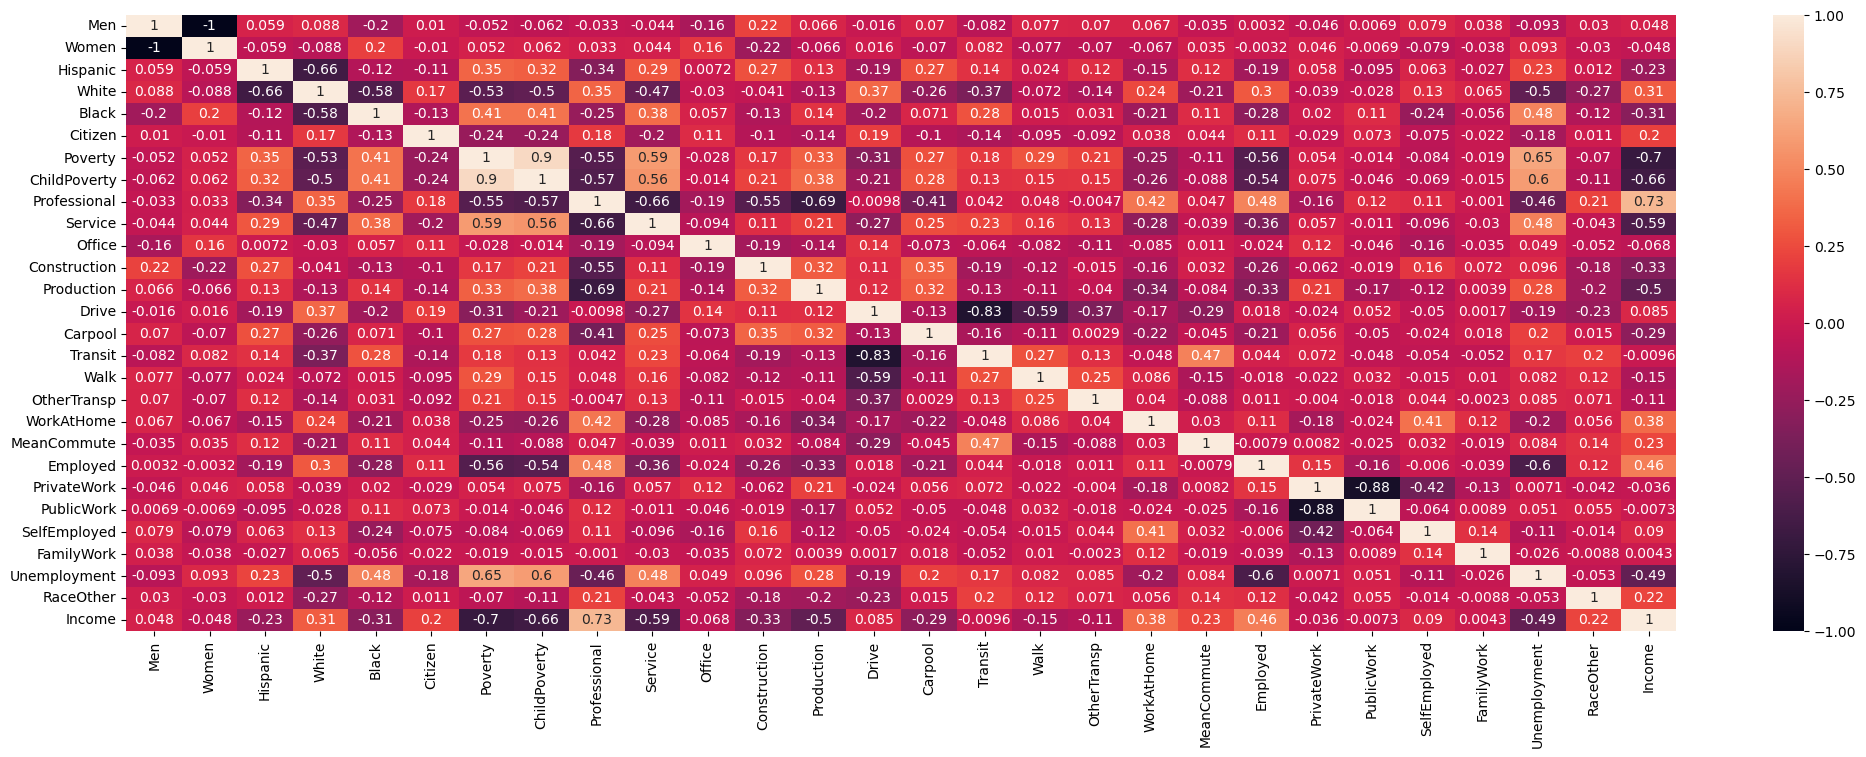

In [72]:
# correlation matrix
plt.figure(figsize=(25,8))
sns.heatmap(data_new.corr(),annot=True)

# unique_values

In [73]:
unique_values=[None]*len(Numerical)
for i, p in enumerate(Numerical):
    unique_values[i]= len(data_new[p].unique())
    print('unique_values',p," =", unique_values[i])

unique_values Men  = 68348
unique_values Women  = 68348
unique_values Hispanic  = 1001
unique_values White  = 1001
unique_values Black  = 1000
unique_values Citizen  = 7140
unique_values Poverty  = 815
unique_values ChildPoverty  = 960
unique_values Professional  = 864
unique_values Service  = 589
unique_values Office  = 470
unique_values Construction  = 481
unique_values Production  = 491
unique_values Drive  = 977
unique_values Carpool  = 413
unique_values Transit  = 831
unique_values Walk  = 565
unique_values OtherTransp  = 286
unique_values WorkAtHome  = 338
unique_values MeanCommute  = 521
unique_values Employed  = 70623
unique_values PrivateWork  = 676
unique_values PublicWork  = 631
unique_values SelfEmployed  = 315
unique_values FamilyWork  = 73
unique_values Unemployment  = 468
unique_values RaceOther  = 1390
unique_values Income  = 41503


# Checking Outliers

<Figure size 640x480 with 0 Axes>

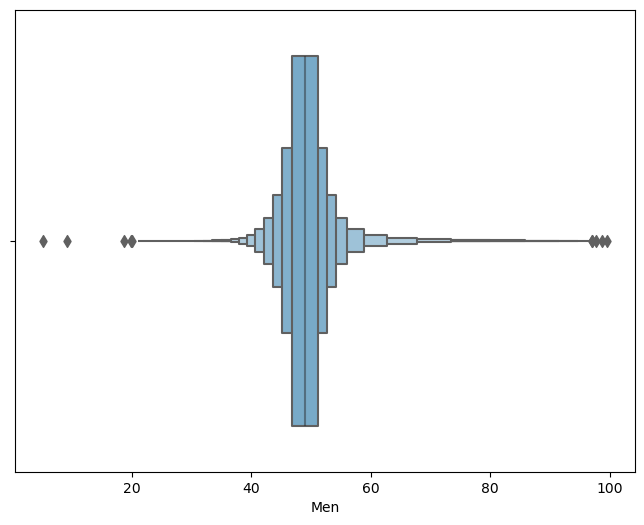

<Figure size 640x480 with 0 Axes>

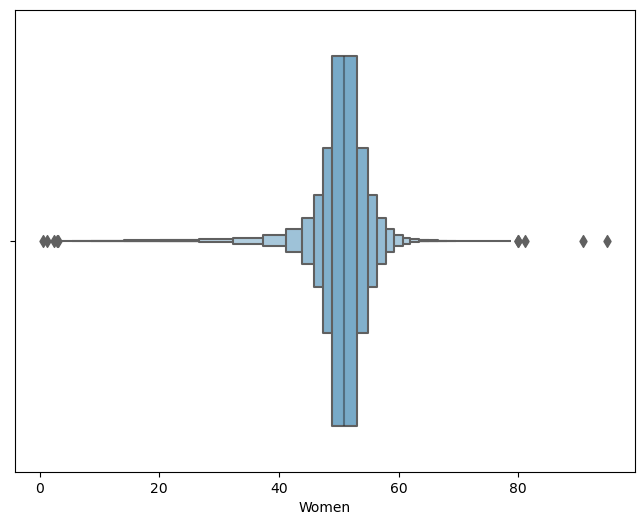

<Figure size 640x480 with 0 Axes>

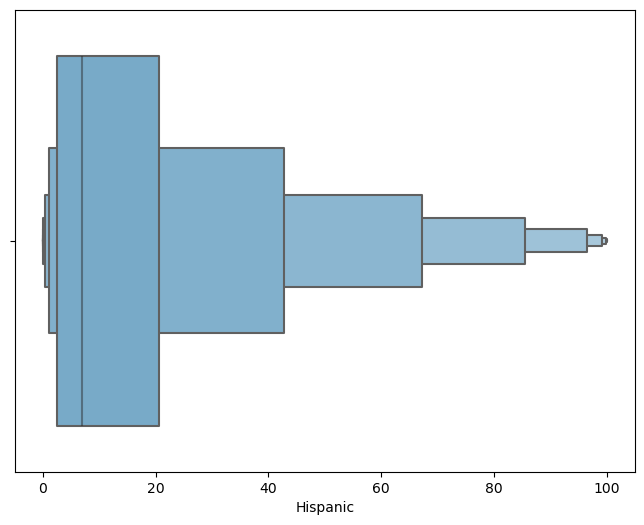

<Figure size 640x480 with 0 Axes>

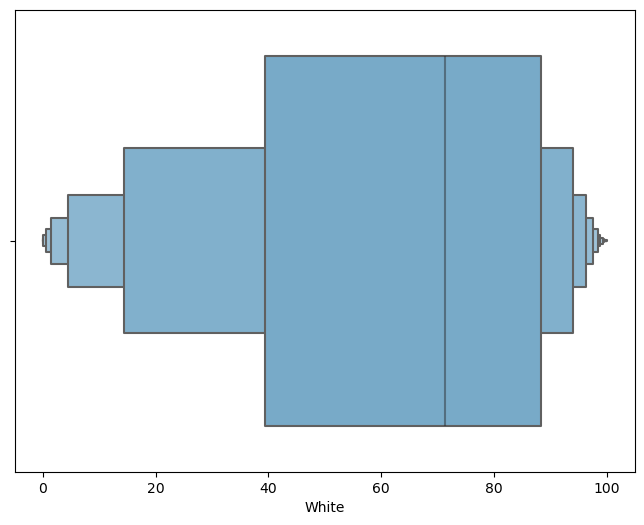

<Figure size 640x480 with 0 Axes>

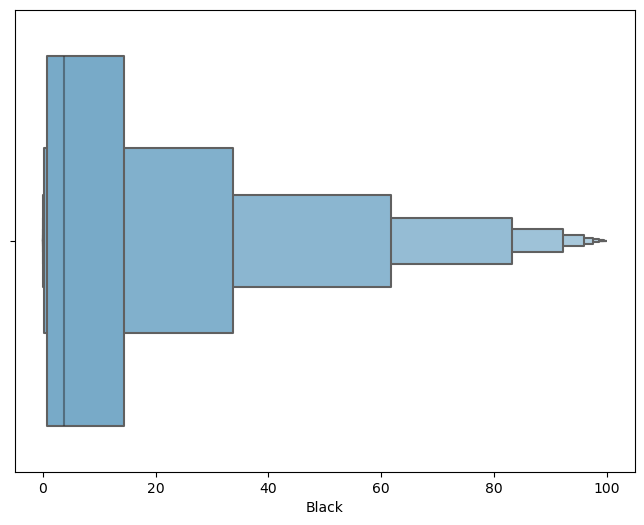

<Figure size 640x480 with 0 Axes>

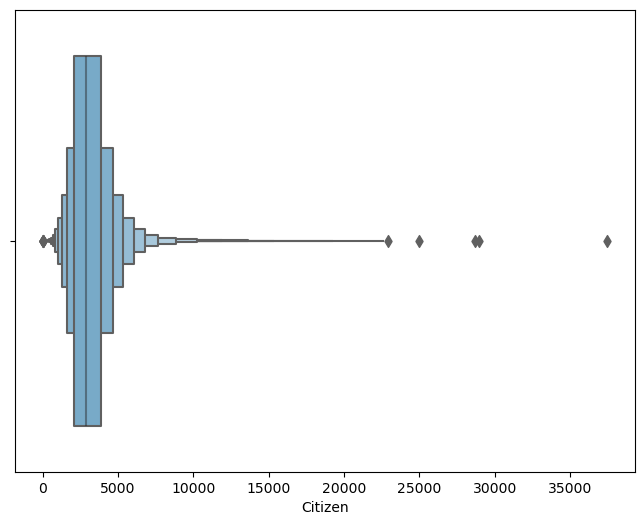

<Figure size 640x480 with 0 Axes>

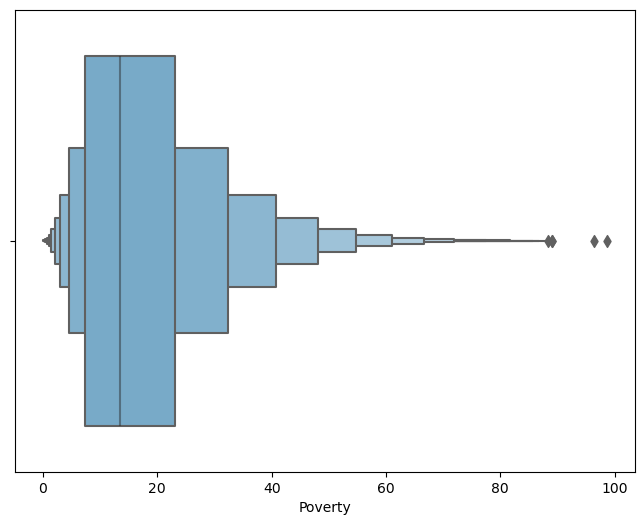

<Figure size 640x480 with 0 Axes>

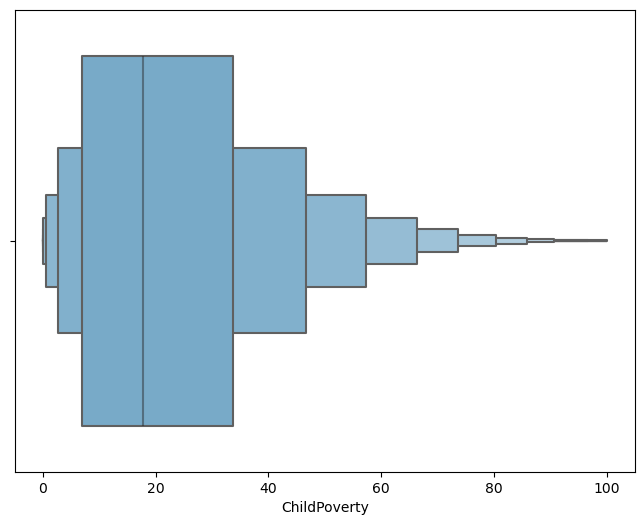

<Figure size 640x480 with 0 Axes>

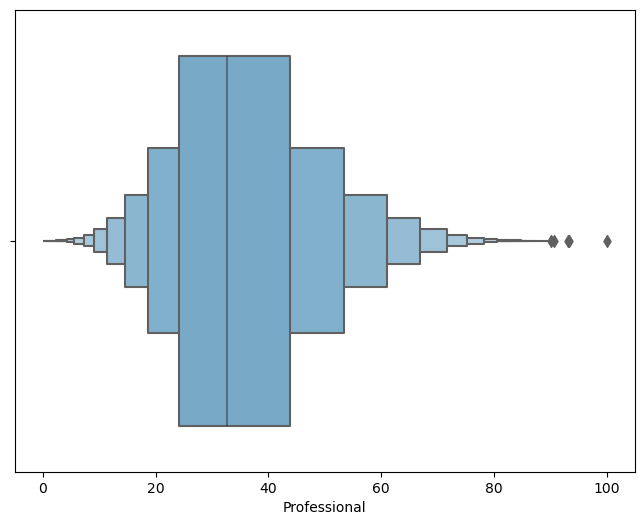

<Figure size 640x480 with 0 Axes>

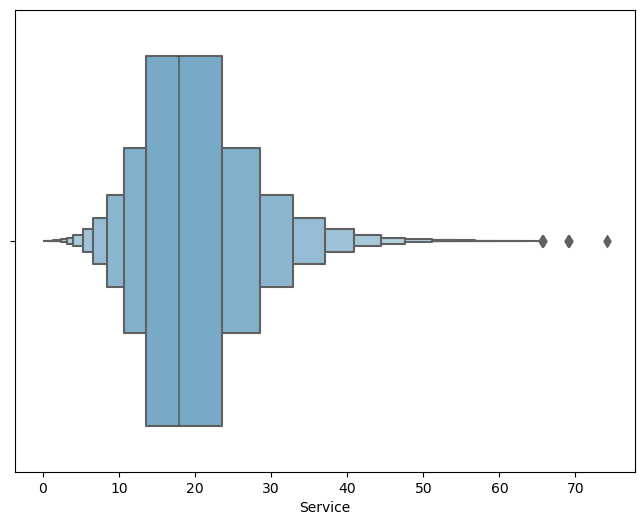

<Figure size 640x480 with 0 Axes>

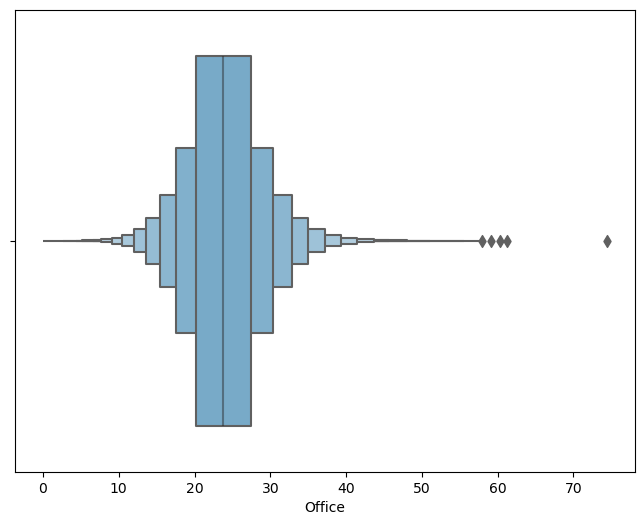

<Figure size 640x480 with 0 Axes>

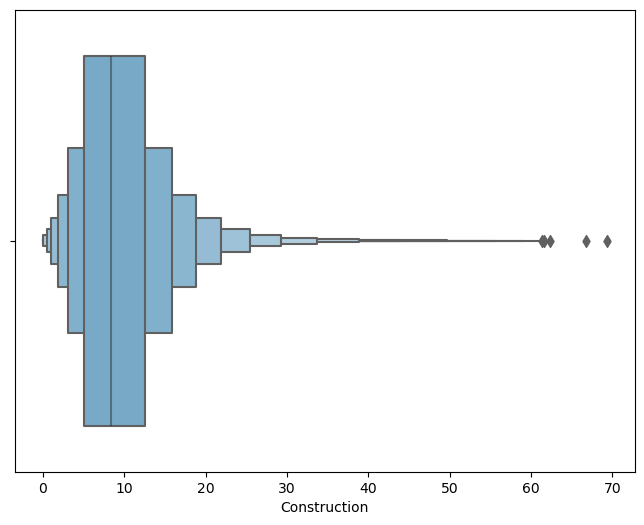

<Figure size 640x480 with 0 Axes>

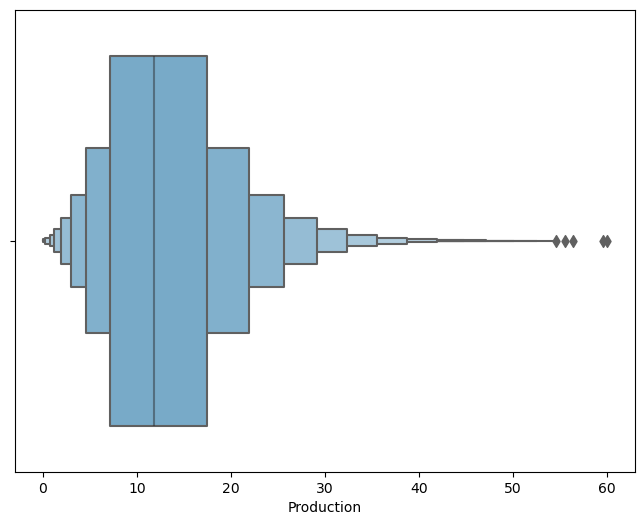

<Figure size 640x480 with 0 Axes>

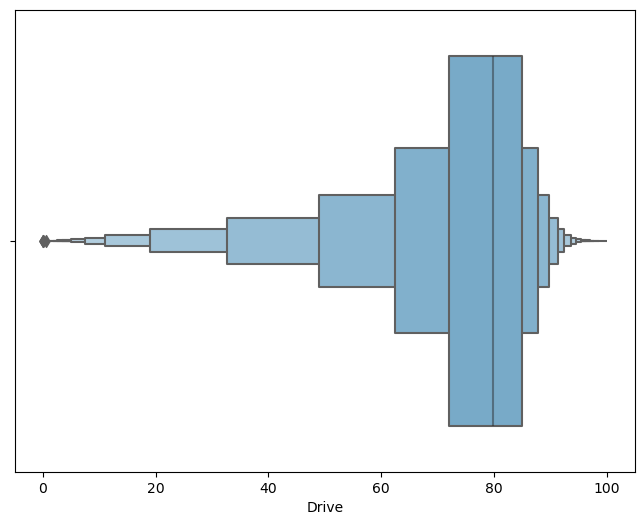

<Figure size 640x480 with 0 Axes>

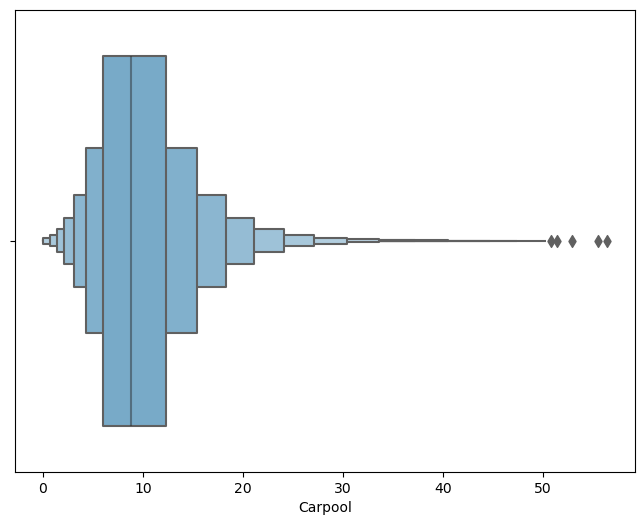

<Figure size 640x480 with 0 Axes>

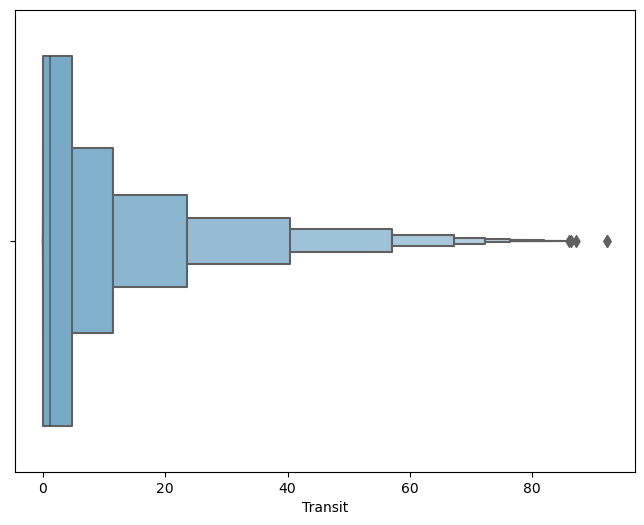

<Figure size 640x480 with 0 Axes>

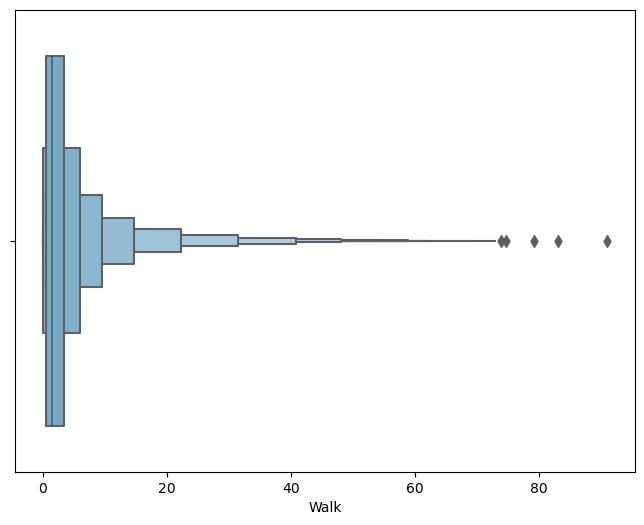

<Figure size 640x480 with 0 Axes>

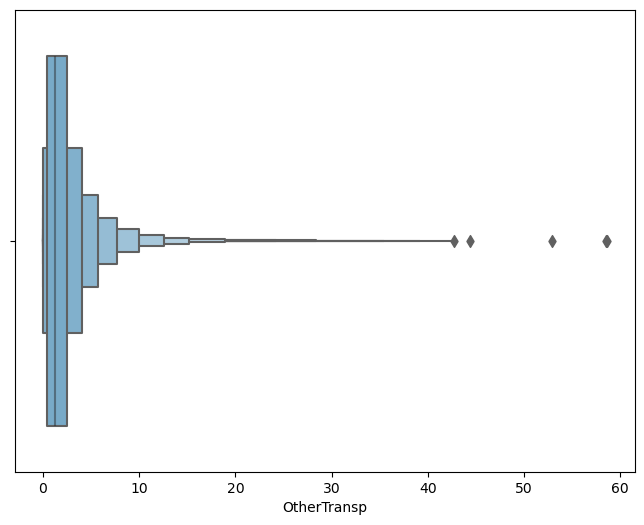

<Figure size 640x480 with 0 Axes>

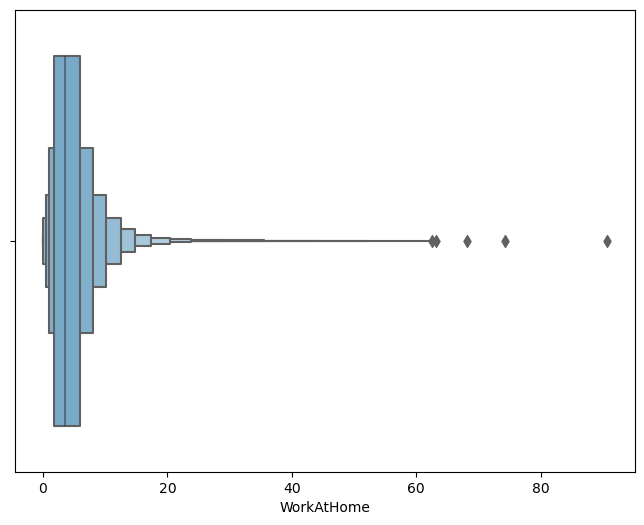

<Figure size 640x480 with 0 Axes>

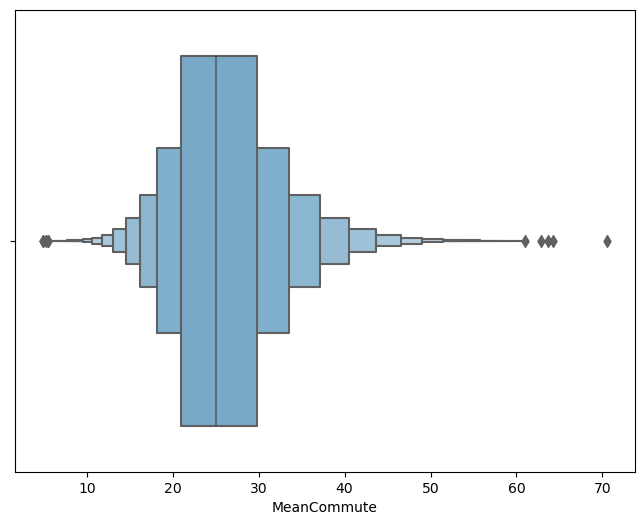

<Figure size 640x480 with 0 Axes>

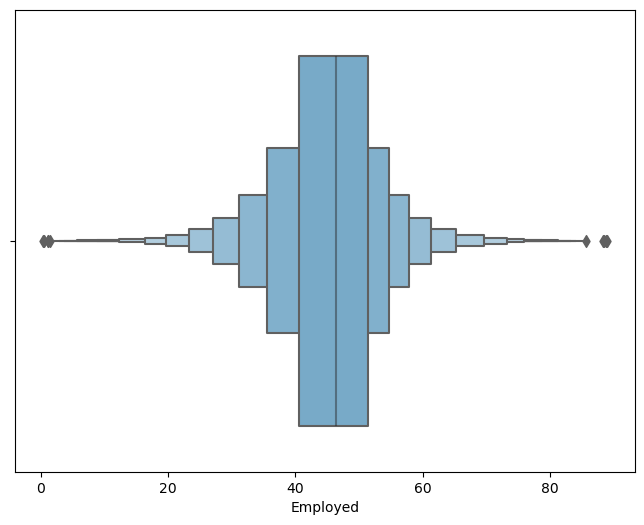

<Figure size 640x480 with 0 Axes>

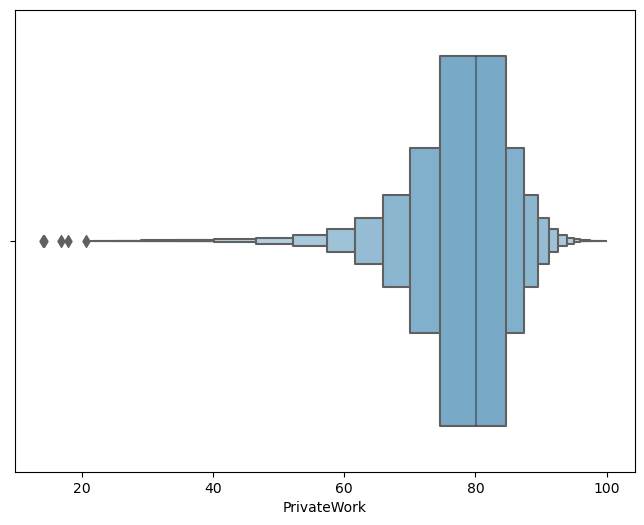

<Figure size 640x480 with 0 Axes>

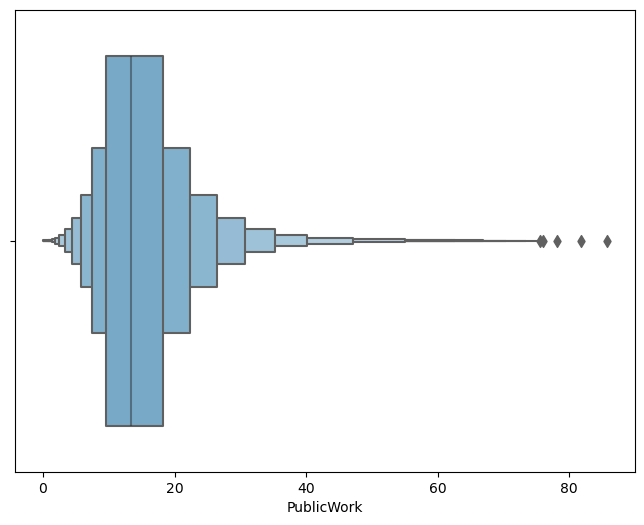

<Figure size 640x480 with 0 Axes>

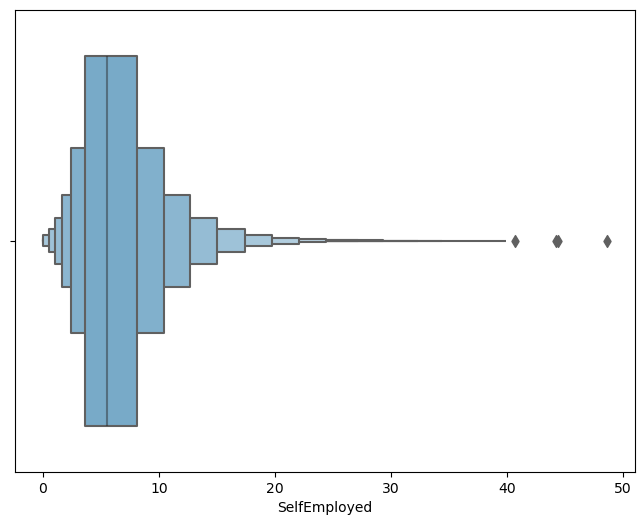

<Figure size 640x480 with 0 Axes>

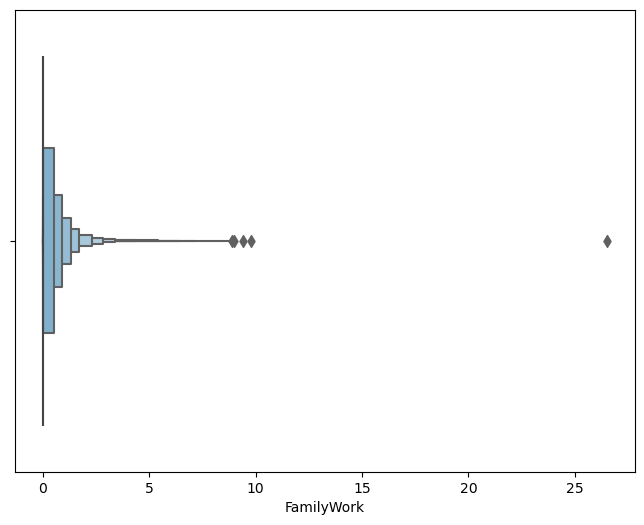

<Figure size 640x480 with 0 Axes>

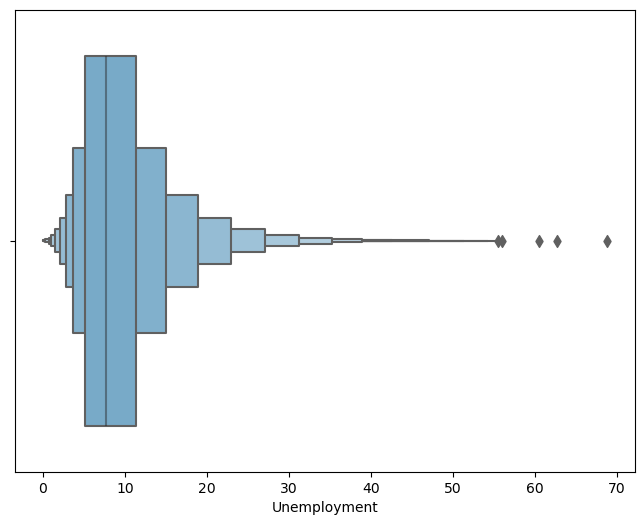

<Figure size 640x480 with 0 Axes>

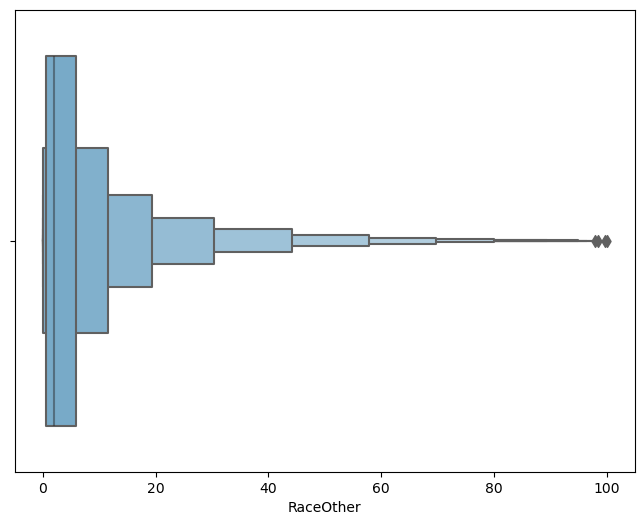

<Figure size 640x480 with 0 Axes>

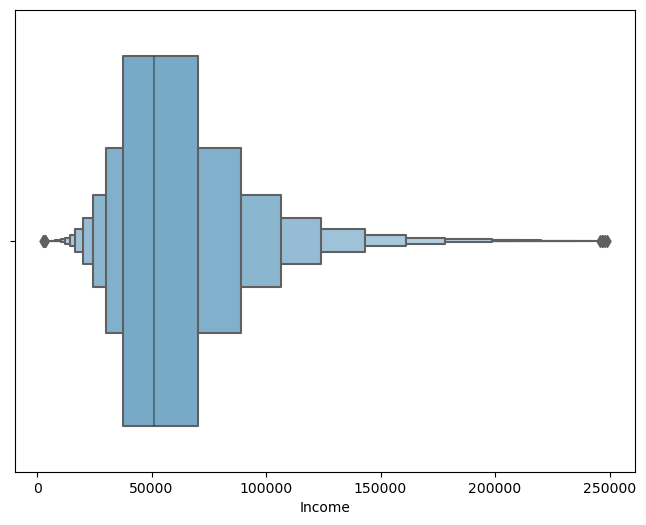

In [74]:
for i in Numerical:
    plt.figure()
    plt.tight_layout()
    
    plt.figure(figsize=(8,6))
    sns.boxenplot(x=data_new[i],palette='Blues')
    plt.show()


In [75]:
number_of_outliers=[None]*len(Numerical)
q75=[None]*len(Numerical)
q25=[None]*len(Numerical)
IQR=[None]*len(Numerical)


for i, p in enumerate(Numerical):
    q75[i], q25[i]= np.percentile(data_new[p],[95,5])
    IQR[i]= q75[i]- q25[i]
    #number_of_outliers[i]=df[~((df[p] < (q75[i] + 1.5 * IQR[i])) & (df[p] > (q25[i]-1.5*IQR[i])))].shape[0]
    number_of_outliers[i]=len((np.where((data_new[p] > (q75[i] + 1.5 * IQR[i])) | (data_new[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    
    print('outliers of',p," =", number_of_outliers[i])
    
    print("*"*40)

outliers of Men  = 162
****************************************
outliers of Women  = 162
****************************************
outliers of Hispanic  = 0
****************************************
outliers of White  = 0
****************************************
outliers of Black  = 0
****************************************
outliers of Citizen  = 67
****************************************
outliers of Poverty  = 0
****************************************
outliers of ChildPoverty  = 0
****************************************
outliers of Professional  = 0
****************************************
outliers of Service  = 1
****************************************
outliers of Office  = 1
****************************************
outliers of Construction  = 48
****************************************
outliers of Production  = 0
****************************************
outliers of Drive  = 0
****************************************
outliers of Carpool  = 19
**************************************

In [76]:
#Find the outliers records which fall with +/- 5% boundaries 

Q1 = data_new.quantile(0.05)
Q3 = data_new.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(data_new[((data_new < (Q1 - 1.5 * IQR)) |(data_new > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  2686


## Distrbution of data point 

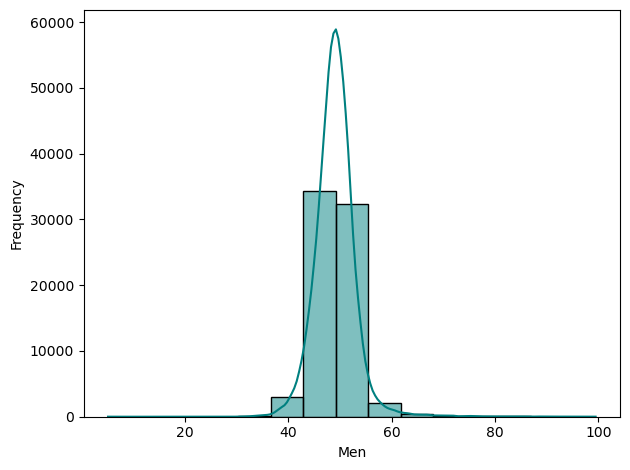

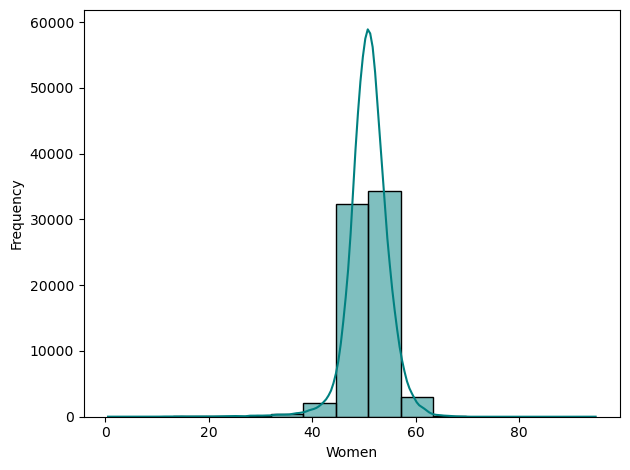

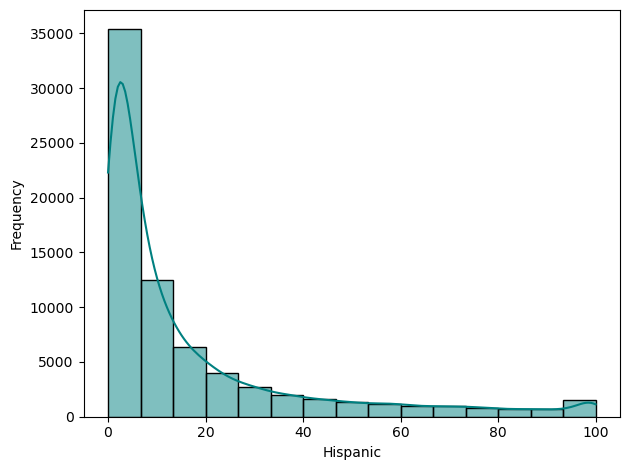

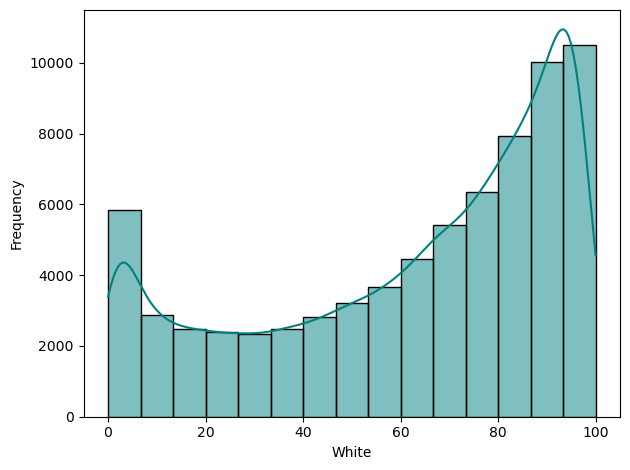

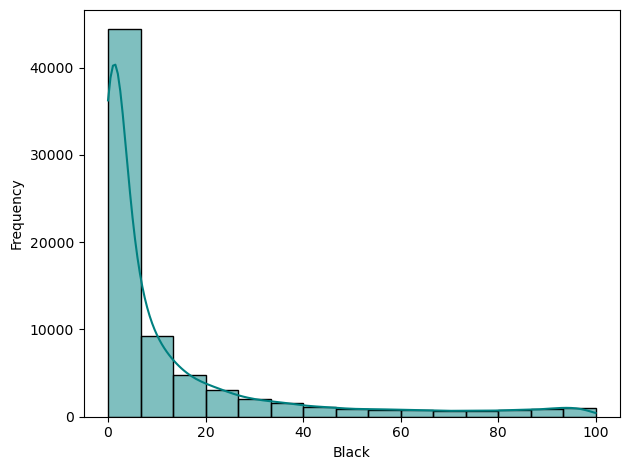

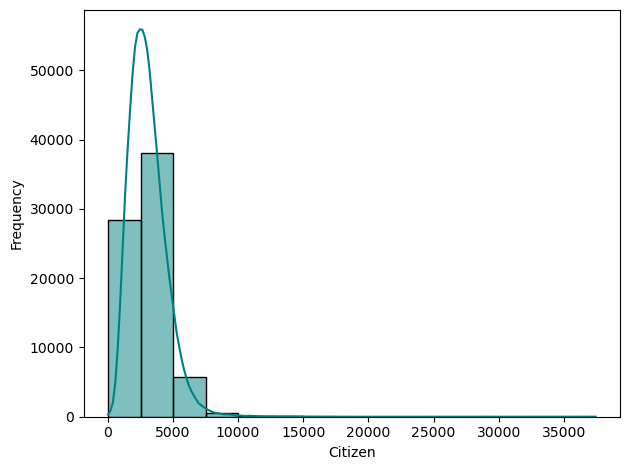

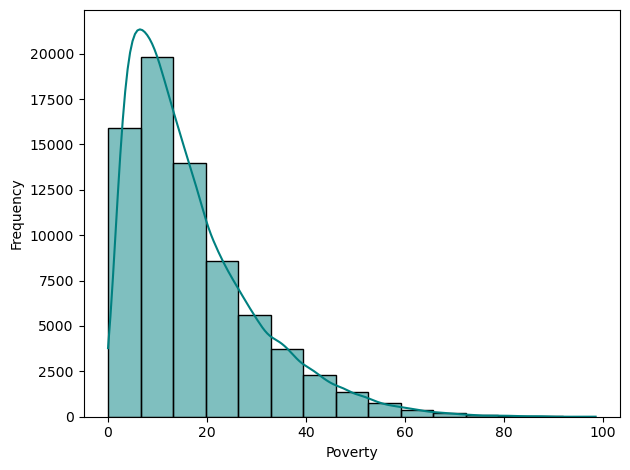

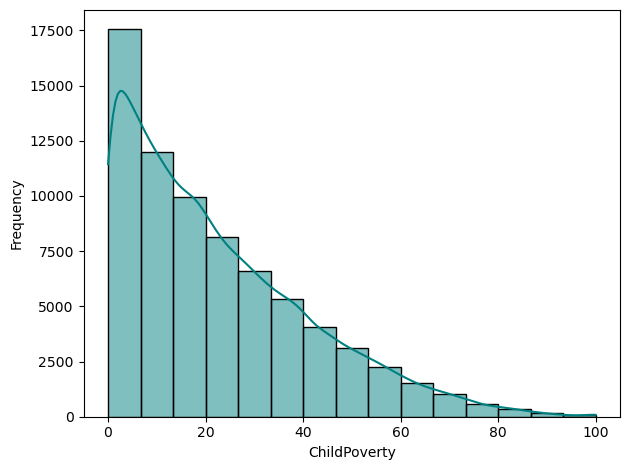

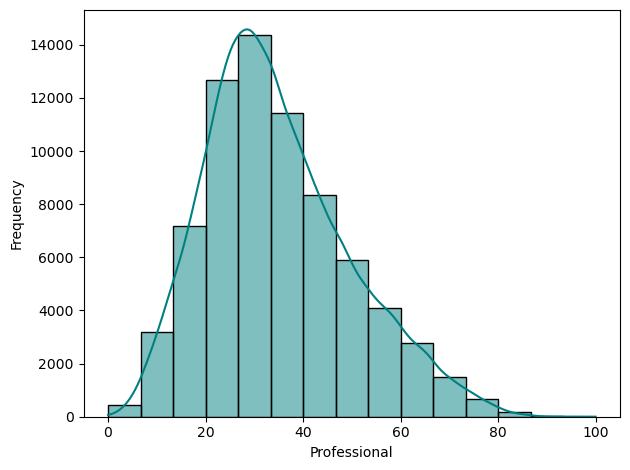

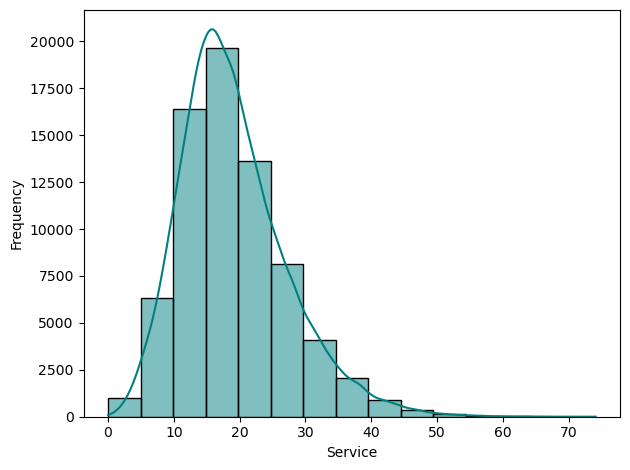

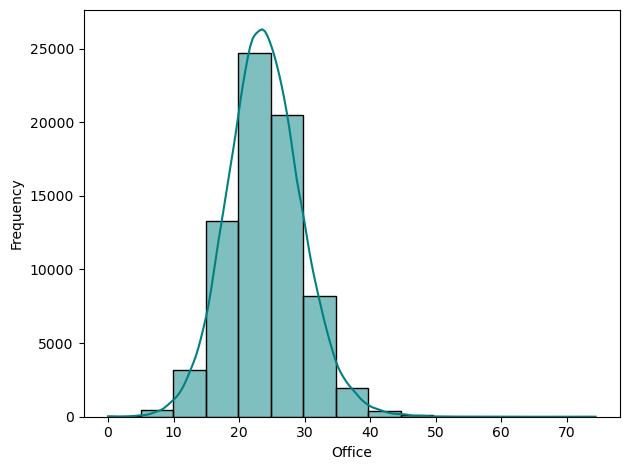

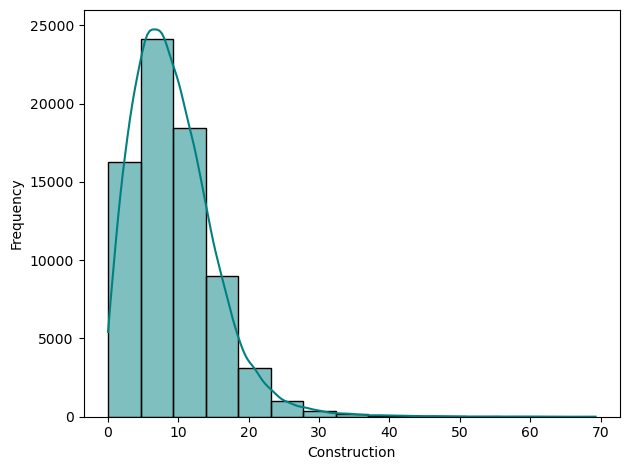

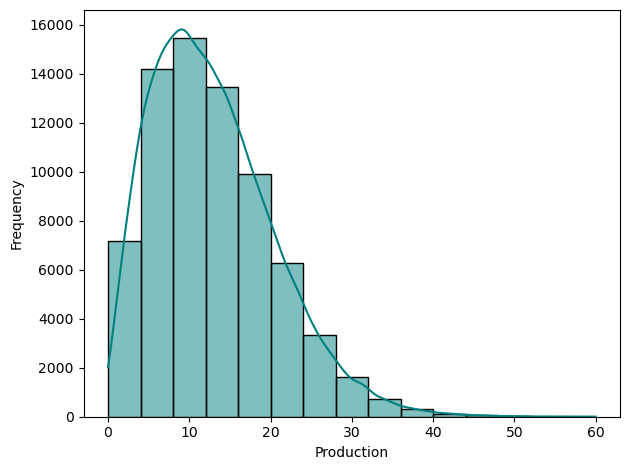

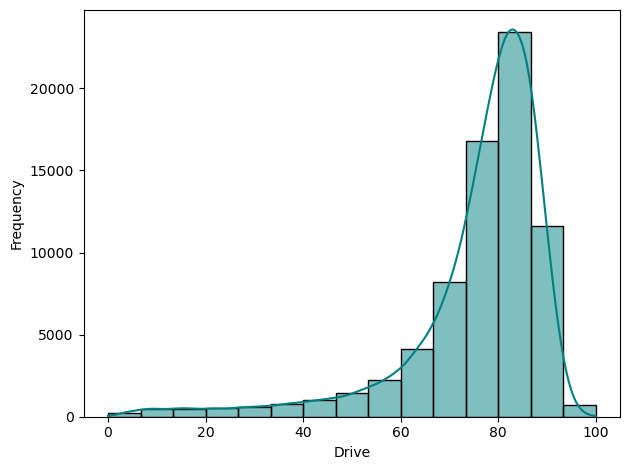

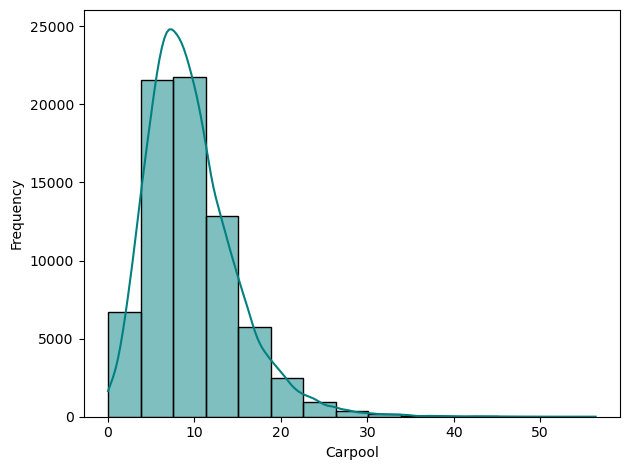

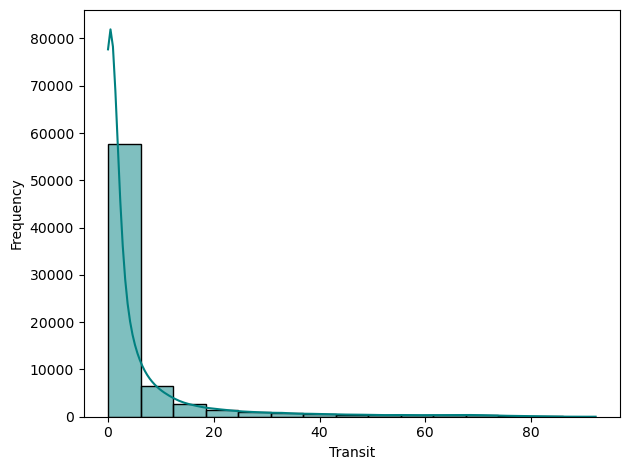

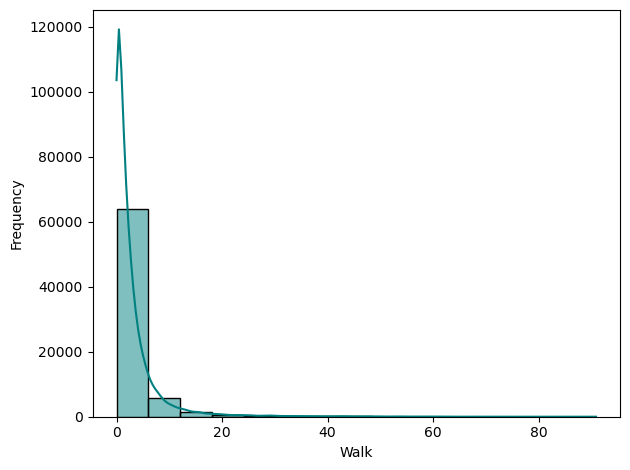

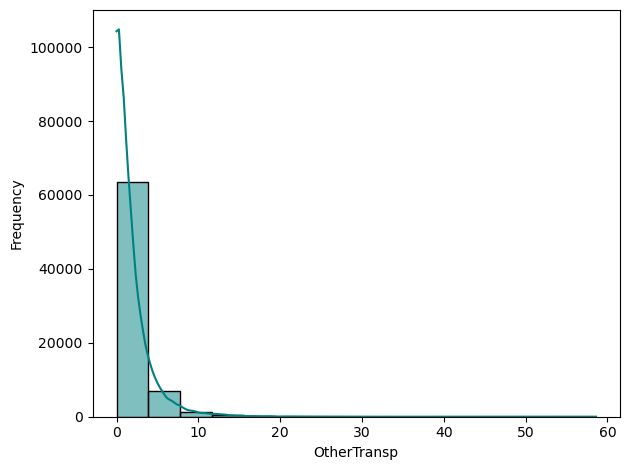

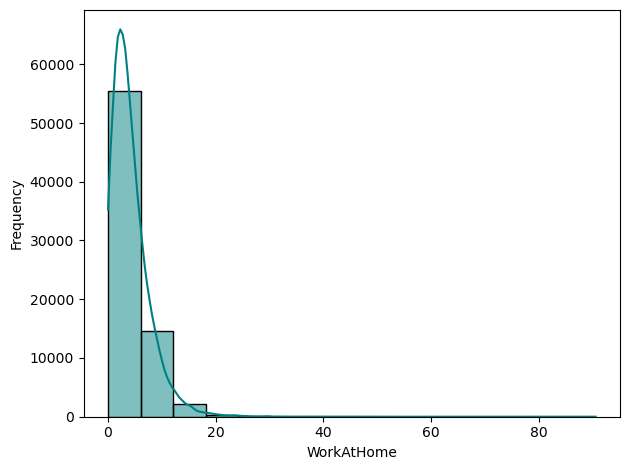

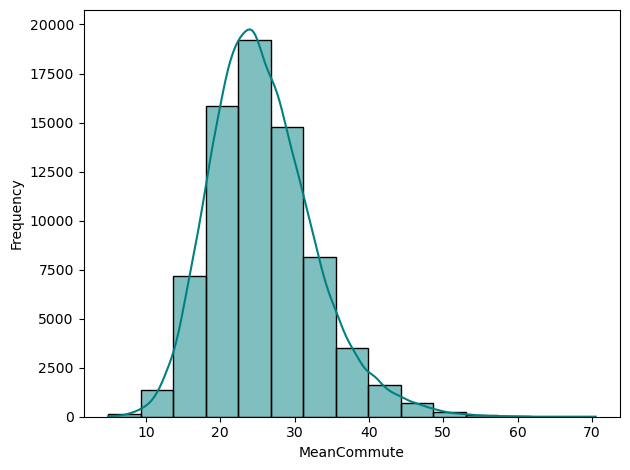

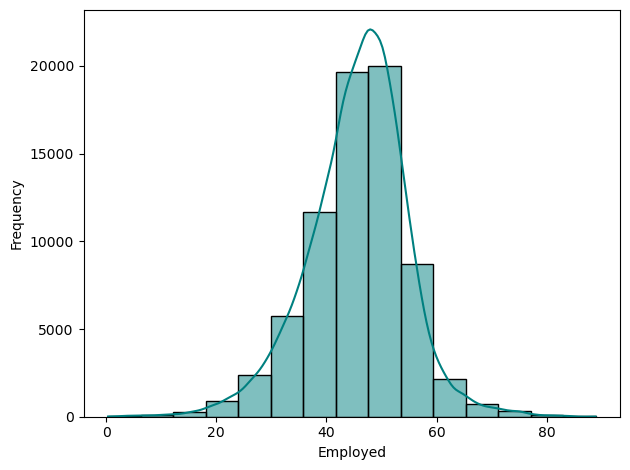

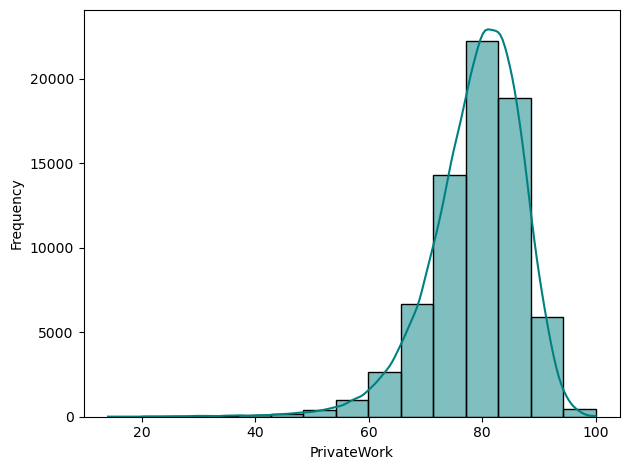

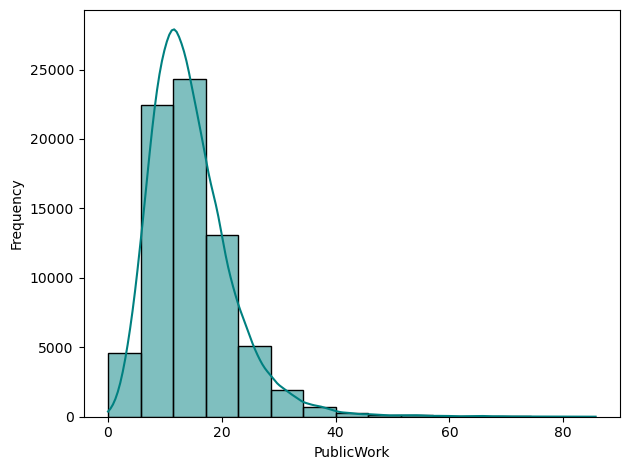

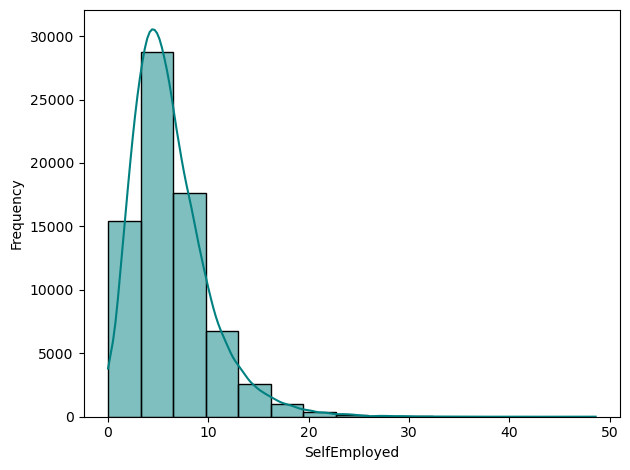

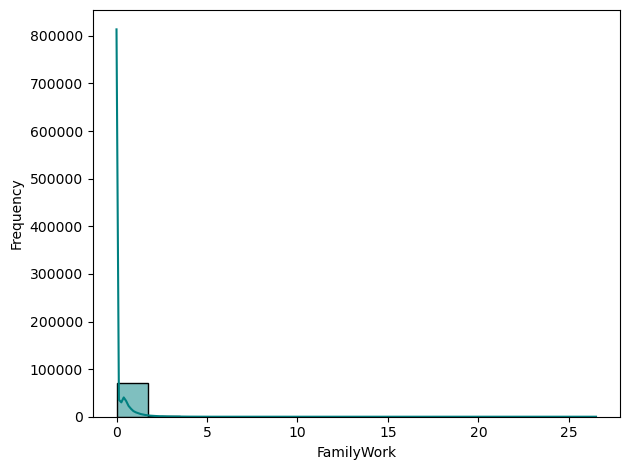

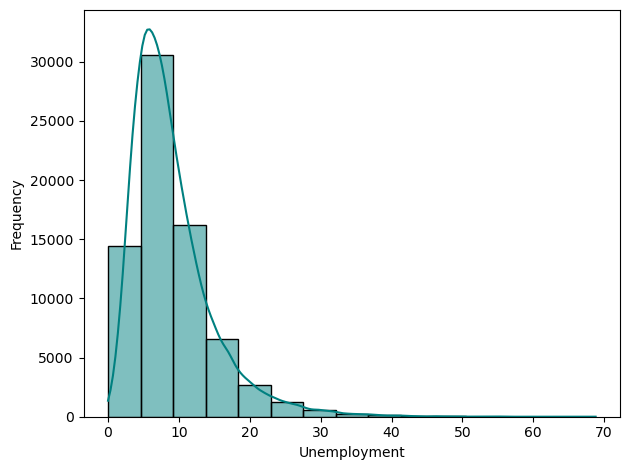

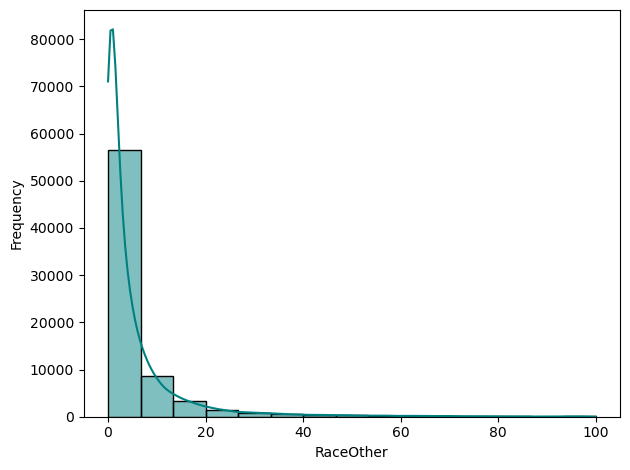

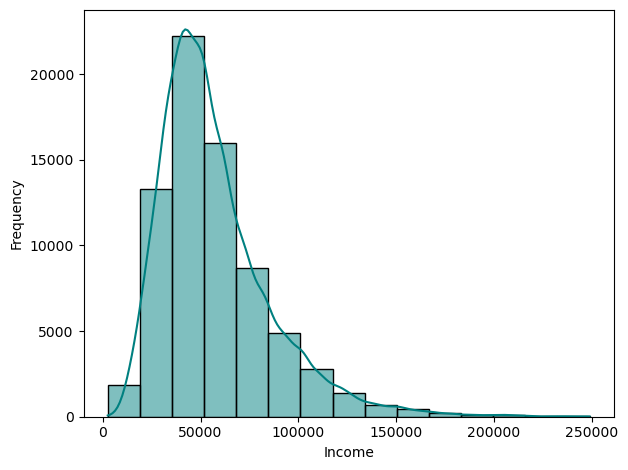

In [77]:
for i in Numerical:
    ax=sns.histplot(x= data_new[i], color='teal', bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')
    
    plt.tight_layout()
    plt.show()

In [78]:
# Create a list of float colums to check for skewing
mask = data_new.dtypes == np.float
float_cols = data_new.columns[mask]

skew_limit = 1.8 # define a limit above which we will log transform
skew_vals = data_new[float_cols].skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_1720\3393251313.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data_new.dtypes == np.float


In [79]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
FamilyWork,7.299289
Walk,5.021101
OtherTransp,4.165444
RaceOther,4.134991
Transit,3.628001
WorkAtHome,2.597884
Black,2.317443
Hispanic,1.997605
Unemployment,1.817818
Drive,-2.192021


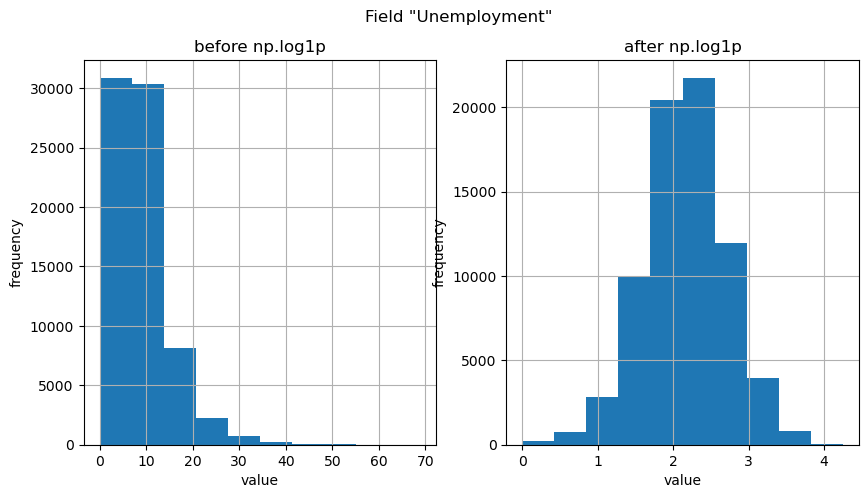

In [80]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Unemployment"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
data_new[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
data_new[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [81]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "state":
        continue
    data_new[col] = data_new[col].apply(np.log1p)

# Splitting the data into train and test sets¶

In [82]:
X= data_new.drop(["Income"], axis=1)
y= data_new.Income

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58181, 27), (14546, 27), (58181,), (14546,))

# PCA

In [86]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe

# performing standardization
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)



In [87]:
from sklearn.decomposition import PCA
components = 17
pca = PCA(n_components = components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [88]:
X_train.shape

(58181, 17)

Text(0, 0.5, 'Explained variance (%)')

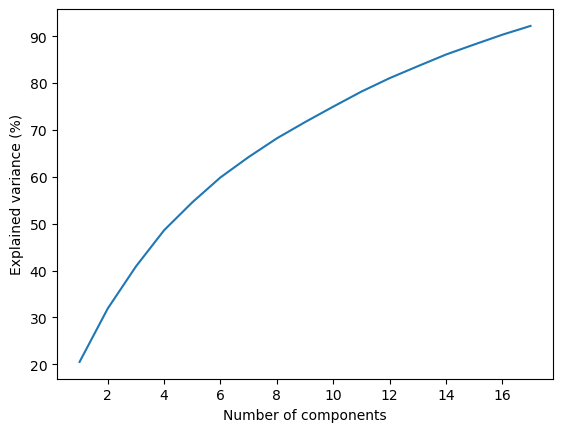

In [89]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


Cumulative Variances (Percentage):
[22.23611798 34.59878893 44.3357686  52.71485738 59.17378302 64.94398397
 69.66181929 73.97868698 77.73787193 81.31642019 84.80065582 87.9066288
 90.67278234 93.37292391 95.69232038]
Number of components: 15


Text(0, 0.5, 'Explained variance (%)')

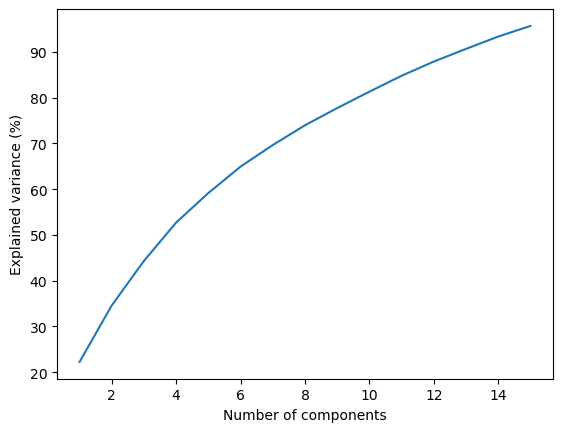

In [46]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.95)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca.explained_variance_ratio_ * 100))
# components = len(pca.explained_variance_ratio_)
# print(f'Number of components: {components}')
# # Make the scree plot
# plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[23.2370977  36.15628589 46.33158484 55.08786616 61.8375464  67.86749837
 72.79771148 77.30890701 81.2373152  84.97695517 88.61803694 91.86382821]
Number of components: 12


Text(0, 0.5, 'Explained variance (%)')

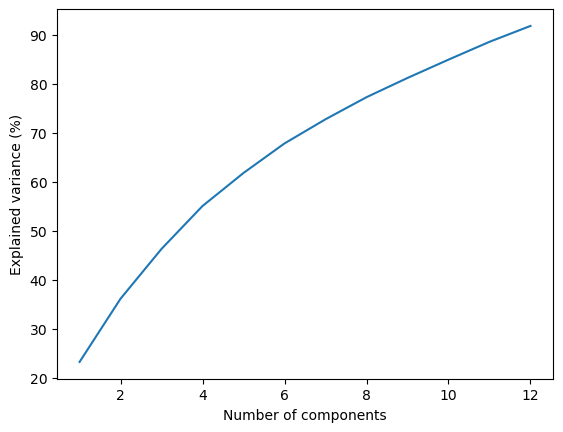

In [47]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.90)
# X_train_1 = pca.fit_transform(X_train)
# X_test_1 = pca.transform(X_test)
# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca.explained_variance_ratio_ * 100))
# components = len(pca.explained_variance_ratio_)
# print(f'Number of components: {components}')
# # Make the scree plot
# plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[23.2370977  36.15628589 46.33158484 55.08786616 61.8375464  67.86749837
 72.79771148 77.30890701 81.2373152  84.97695517 88.61803694]
Number of components: 11


Text(0, 0.5, 'Explained variance (%)')

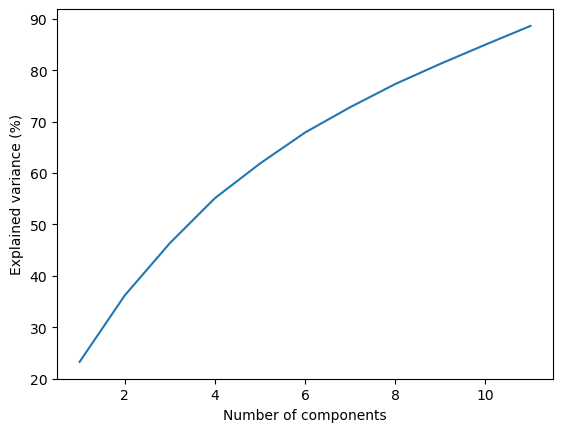

In [48]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.85)
# pca.fit(X_train)
# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca.explained_variance_ratio_ * 100))
# components = len(pca.explained_variance_ratio_)
# print(f'Number of components: {components}')
# # Make the scree plot
# plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")

# model

# LinearRegression

In [90]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred =regressor.predict(X_test)

In [92]:
from sklearn import metrics
# print("\tMean absolute error:",metrics.mean_absolute_error(y_test, y_pred))
print("\tR2 score:",metrics.r2_score(y_test, y_pred))

	R2 score: 0.7033367432245561


C:\Users\dell\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


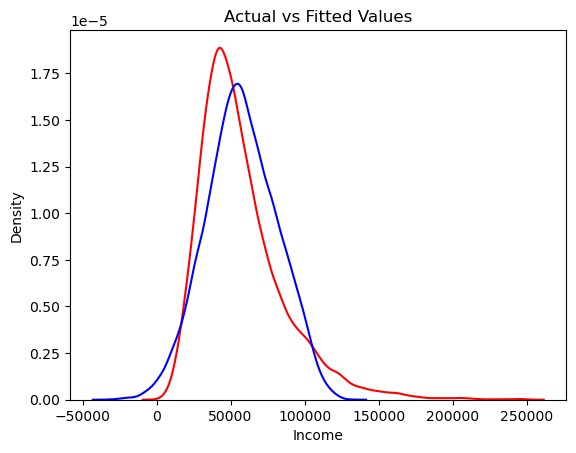

In [93]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Income')

plt.show()
plt.close()

# DecisionTreeRegressor 

In [94]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
y_pred =regressor.predict(X_test)

In [96]:
from sklearn import metrics
# print("\tMean absolute error:",metrics.mean_absolute_error(y_test, y_pred))
print("\tR2 score:",metrics.r2_score(y_test, y_pred))

	R2 score: 0.6148504043069327


C:\Users\dell\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


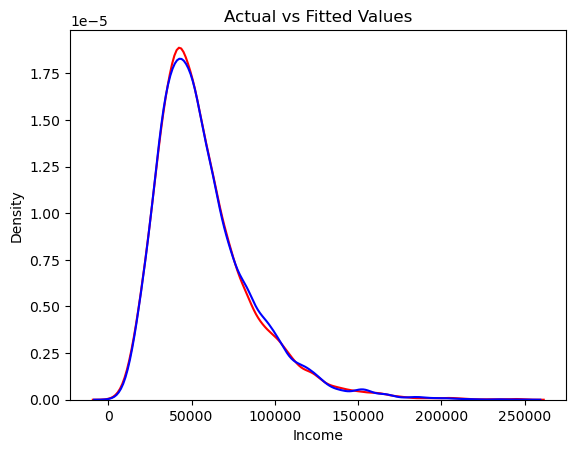

In [97]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Income')

plt.show()
plt.close()

# RandomForestRegressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
y_pred =regressor.predict(X_test)

In [175]:
from sklearn import metrics
# print("\tMean absolute error:",metrics.mean_absolute_error(y_test, y_pred))
print("\tR2 score:",metrics.r2_score(y_test, y_pred))

	R2 score: 0.8073354433876003


C:\Users\dell\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


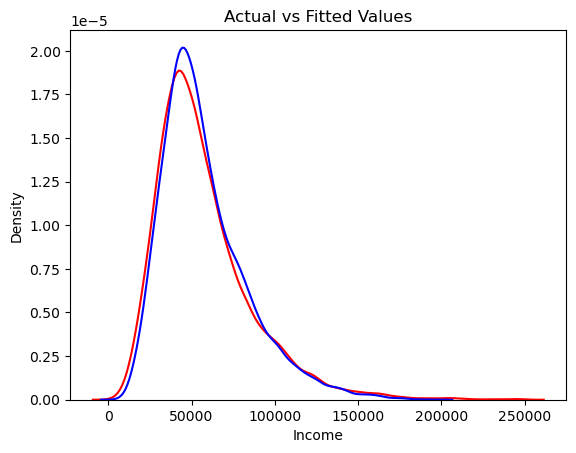

In [176]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Income')

plt.show()
plt.close()

# GridSearch

In [177]:
from sklearn.model_selection import GridSearchCV

In [179]:
RF_param_grid = { 
    'n_estimators': [200, 300, 400],
    'max_features': ['auto','log2'],
    'max_depth' : [10,20,30]}
RF_GridCV = GridSearchCV(RandomForestRegressor(), RF_param_grid, cv=5, n_jobs= -1)
RF_GridCV.fit(X_train,y_train)  
print(RF_GridCV.best_params_)    
print(RF_GridCV.best_score_)


{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 400}
0.8183568619065861


In [180]:
results_RF= pd.DataFrame(RF_GridCV.cv_results_)
results_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,271.398546,1.177796,0.630299,0.024668,10,auto,200,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.807986,0.805920,0.811716,0.809234,0.799029,0.806777,0.004305,15
1,410.839556,2.187784,1.001662,0.112952,10,auto,300,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.807609,0.806561,0.812313,0.809289,0.799259,0.807006,0.004335,14
2,564.193226,1.686993,1.265238,0.024177,10,auto,400,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.807681,0.806640,0.812155,0.809660,0.799282,0.807084,0.004331,13
3,72.486080,0.200155,0.579212,0.012460,10,log2,200,"{'max_depth': 10, 'max_features': 'log2', 'n_e...",0.790941,0.779818,0.791714,0.784216,0.776661,0.784670,0.005947,18
4,110.214716,0.867166,0.877072,0.004848,10,log2,300,"{'max_depth': 10, 'max_features': 'log2', 'n_e...",0.788123,0.781502,0.792889,0.786125,0.779215,0.785571,0.004844,16
5,148.905630,0.643598,1.166492,0.010990,10,log2,400,"{'max_depth': 10, 'max_features': 'log2', 'n_e...",0.787578,0.783067,0.792025,0.785330,0.778801,0.785360,0.004419,17
6,425.321297,2.105465,2.920059,0.756410,20,auto,200,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.817465,0.818036,0.822701,0.819724,0.808455,0.817276,0.004772,11
7,630.710607,2.365225,4.100917,1.527257,20,auto,300,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.817597,0.818133,0.823047,0.820776,0.808908,0.817692,0.004807,7
8,844.711222,4.997941,11.544492,3.879102,20,auto,400,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.818116,0.819236,0.822486,0.820785,0.809352,0.817995,0.004565,3
9,116.140895,1.188849,1.476859,0.087693,20,log2,200,"{'max_depth': 20, 'max_features': 'log2', 'n_e...",0.817593,0.816817,0.822903,0.819675,0.808104,0.817018,0.004930,12


# Conclusion
The best R^2 we get is 0.818 which is Very Good estimation for Income. The model is RandomForestRegressor.

